Loaded RAW: (200000, 24)
Data Overview: {'shape': (200000, 24), 'dtypes': object     20
int64       2
float64     2
Name: count, dtype: int64, 'sample_data':                             Customer_ID        Customer_Name  Gender  Age  \
0  d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e           Osha Tella    Male   60   
1  7c14ad51-781a-4db9-b7bd-67439c175262      Hredhaan Khosla  Female   51   
2  3a73a0e5-d4da-45aa-85f3-528413900a35       Ekani Nazareth    Male   20   
3  7902f4ef-9050-4a79-857d-9c2ea3181940  Yamini Ramachandran  Female   57   
4  3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9         Kritika Rege  Female   43   

         State                City                Bank_Branch Account_Type  \
0       Kerala  Thiruvananthapuram  Thiruvananthapuram Branch      Savings   
1  Maharashtra              Nashik              Nashik Branch     Business   
2        Bihar           Bhagalpur           Bhagalpur Branch      Savings   
3   Tamil Nadu             Chennai             Chennai Branch     B

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


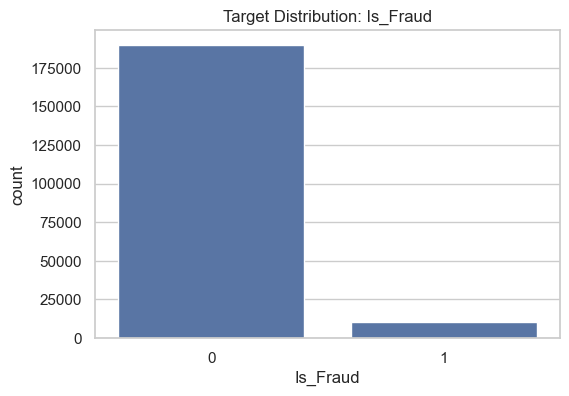

No missing values found.
Class Distribution:


Is_Fraud
0    189912
1     10088
Name: count, dtype: int64

Minority/Majority Ratio: 0.0531
Fraud rate by Transaction_Device


,mean,count
Transaction_Device,,
Debit/Credit Card,0.054998,8273
Virtual Card,0.054473,8059
Biometric Scanner,0.053949,7952
Payment Gateway Device,0.053594,7874
QR Code Scanner,0.051776,7938
Voice Assistant,0.051250,8039
ATM Booth Kiosk,0.051161,21149
Web Browser,0.051121,7981
Desktop/Laptop,0.051012,8057


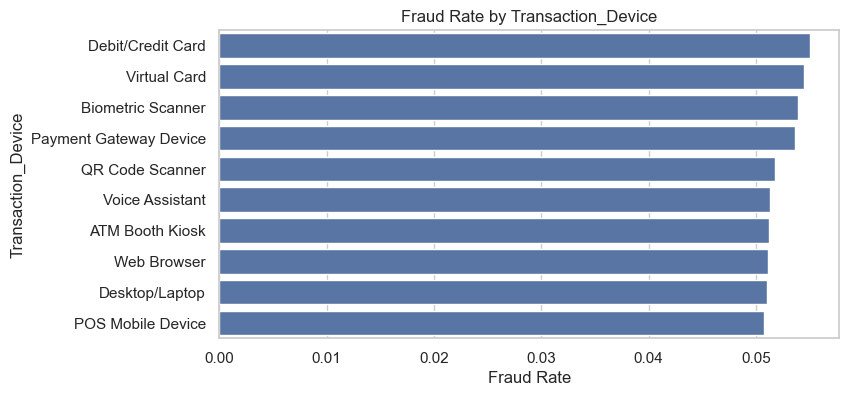

Fraud rate by Account_Type


,mean,count
Account_Type,,
Business,0.051682,66483
Savings,0.050291,66593
Checking,0.049354,66924


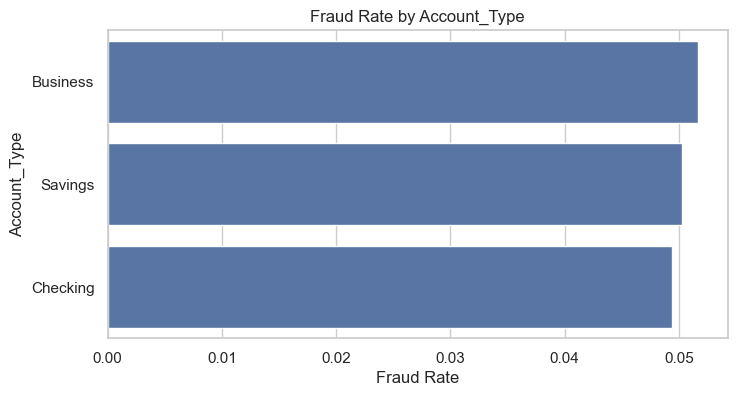

Fraud rate by Transaction_Type


,mean,count
Transaction_Type,,
Transfer,0.051886,39953
Credit,0.050971,40180
Debit,0.050762,40050
Withdrawal,0.049300,39777
Bill Payment,0.049276,40040


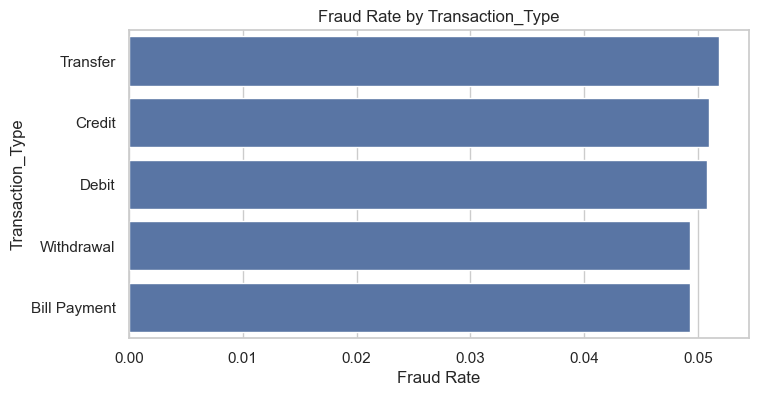

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


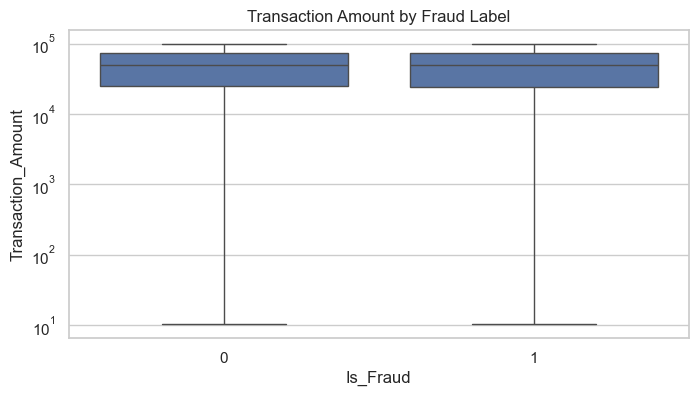

High-value threshold (IQR): 148509.54
Fraud rate above threshold:


nan

Categorical Feature Cardinality:


Transaction_Device      20
Merchant_Category        6
Transaction_Type         5
Device_Type              4
Account_Type             3
Gender                   2
Transaction_Currency     1
dtype: int64

INFO:root:Dropping irrelevant columns: ['Customer_ID', 'Customer_Name', 'Merchant_ID', 'Customer_Contact', 'Customer_Email', 'Transaction_ID', 'Transaction_Description', 'Transaction_Currency']
INFO:root:Encoding categorical columns: ['Gender', 'State', 'Account_Type', 'Transaction_Type', 'Merchant_Category', 'Transaction_Device', 'Device_Type']


Saved CLEAN CSV: (200000, 17)
Saved FEATURES CSV: (200000, 84)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, List, Tuple, Dict, Any

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Display Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = 120
import warnings
warnings.filterwarnings('ignore')


import sys
sys.path.append("../src/")

import pandas as pd
from eda_utils import (
    overview,
    eda_descriptive,
    plot_target_distribution,
    plot_missing_heatmap,
    class_imbalance_report,
    fraud_rate_by_feature,
    fraud_by_time,
    amount_outlier_analysis,
    feature_cardinality
)
from preprocessing import (
    clean_missing,
    drop_irrelevant_columns,
    feature_engineering_advanced,
    encode_categorical
)

# =====================================================
# 1. Load RAW CSV
# =====================================================
df_raw = pd.read_csv("../data/raw/Bank_Transaction_Fraud_Detection.csv")
print("Loaded RAW:", df_raw.shape)

overview_stats = overview(df_raw)
print("Data Overview:", overview_stats)

# =====================================================
# 2. EDA (RAW DATA)
# =====================================================
eda_descriptive(df_raw)
plot_target_distribution(df_raw)
plot_missing_heatmap(df_raw)

# ---- Fraud-specific EDA ----
class_imbalance_report(df_raw)

fraud_rate_by_feature(df_raw, feature="Transaction_Device")
fraud_rate_by_feature(df_raw, feature="Account_Type")
fraud_rate_by_feature(df_raw, feature="Transaction_Type")

fraud_by_time(df_raw)
amount_outlier_analysis(df_raw)
feature_cardinality(df_raw)

# =====================================================
# 3. CLEANING & FEATURE ENGINEERING (NO ENCODING)
# =====================================================
df_clean = clean_missing(df_raw)

df_clean = drop_irrelevant_columns(df_clean, [
    "Customer_ID",
    "Customer_Name",
    "Merchant_ID",
    "Customer_Contact",
    "Customer_Email",
    "Transaction_ID",
    "Transaction_Description",
    "Transaction_Currency"
])

df_clean = feature_engineering_advanced(df_clean)

# =====================================================
# 4. SAVE CLEAN DATA (for Streamlit & rules)
# =====================================================
df_clean.to_csv(
    "../data/processed/bank_transactions_clean.csv",
    index=False
)
print("Saved CLEAN CSV:", df_clean.shape)

# =====================================================
# 5. ENCODE FOR ML ONLY
# =====================================================
df_features = encode_categorical(
    df_clean.copy(),
    drop_first=False,
    max_cardinality=50
)

df_features.to_csv(
    "../data/processed/bank_transactions_features.csv",
    index=False
)
print("Saved FEATURES CSV:", df_features.shape)


In [4]:
# df=pd.read_csv("../data/processed/bank_transactions_features.csv")
# df.head()
